# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

%matplotlib inline

In [2]:
# load messages dataset
messages = pd.read_csv('disaster_messages.csv')
messages.head(20)

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct


In [3]:
# load categories dataset
categories = pd.read_csv('disaster_categories.csv')
categories.head(20)

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...
5,14,related-0;request-0;offer-0;aid_related-0;medi...
6,15,related-1;request-0;offer-0;aid_related-0;medi...
7,16,related-1;request-1;offer-0;aid_related-1;medi...
8,17,related-0;request-0;offer-0;aid_related-0;medi...
9,18,related-1;request-1;offer-0;aid_related-1;medi...


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [4]:
# merge datasets
merged_df = pd.merge(messages, categories, on='id')
merged_df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [5]:
# create a dataframe of the 36 individual category columns
categories = merged_df.categories.str.split(';', expand=True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [6]:
# select the first row of the categories dataframe
row = categories.head(1)

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.apply(lambda x: x.str.slice(stop=-2)).values[0]
print(category_colnames)

['related' 'request' 'offer' 'aid_related' 'medical_help'
 'medical_products' 'search_and_rescue' 'security' 'military'
 'child_alone' 'water' 'food' 'shelter' 'clothing' 'money'
 'missing_people' 'refugees' 'death' 'other_aid' 'infrastructure_related'
 'transport' 'buildings' 'electricity' 'tools' 'hospitals' 'shops'
 'aid_centers' 'other_infrastructure' 'weather_related' 'floods' 'storm'
 'fire' 'earthquake' 'cold' 'other_weather' 'direct_report']


In [7]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [8]:
a = 'abc-1'
a[-1]

'1'

In [9]:
categories.applymap(lambda x: x[-1]).apply(lambda x: x.astype(int), axis=1).head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].apply(lambda x: x[-1])
    
    # convert column from string to numeric
    categories[column] = categories[column].astype(int)
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
categories.sum().sort_values(ascending=False)

related                   20450
aid_related               10954
weather_related            7343
direct_report              5113
request                    4513
other_aid                  3464
food                       2956
storm                      2464
earthquake                 2461
shelter                    2342
floods                     2177
medical_help               2099
infrastructure_related     1709
water                      1684
other_weather              1379
buildings                  1345
medical_products           1319
transport                  1212
death                      1204
other_infrastructure       1155
refugees                    880
military                    863
search_and_rescue           725
money                       606
electricity                 538
cold                        533
security                    471
clothing                    410
aid_centers                 309
missing_people              301
hospitals                   283
fire    

In [12]:
categories.shape

(26386, 36)

### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [13]:
# drop the original categories column from `df`
merged_df.drop('categories',axis=1, inplace=True)
merged_df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [14]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([merged_df,categories], axis=1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [15]:
# check number of duplicates
print(df.duplicated().sum())
df[df.duplicated()]

170


,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
164,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
165,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
658,804,elle est vraiment malade et a besoin d'aide. u...,she is really sick she need your help. please ...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
659,804,elle est vraiment malade et a besoin d'aide. u...,she is really sick she need your help. please ...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660,804,elle est vraiment malade et a besoin d'aide. u...,she is really sick she need your help. please ...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25291,29022,"In a field in Jallouzai, just inside Pakistan,...",NaN,news,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
25292,29022,"In a field in Jallouzai, just inside Pakistan,...",NaN,news,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
25378,29119,Most victims (90 per cent) show little or no s...,NaN,news,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
25379,29119,Most victims (90 per cent) show little or no s...,NaN,news,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [17]:
# check number of duplicates
print(df.duplicated().sum())
df[df.duplicated()]

0


,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report


### 7. Perform Some Data Exploration

In [18]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


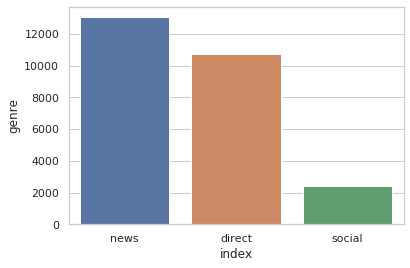

In [19]:
messages_per_genre = df.genre.value_counts().reset_index()
sns.set(style="whitegrid")
sns.barplot(x="index", y="genre", data=messages_per_genre);

In [20]:
melted_df = pd.melt(df, id_vars=['id','message','original','genre'], var_name='category')
melted_df = melted_df[melted_df['value'] == 1].drop('value', axis=1)
melted_df

,id,message,original,genre,category
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related
...,...,...,...,...,...
943691,30169,Torrential rains in the state have left more t...,NaN,news,direct_report
943741,30227,Day 12: We head north to the edge of the Guera...,NaN,news,direct_report
943757,30245,We're providing clean water to people who woul...,NaN,news,direct_report
943758,30246,"Relief items include towels, sanitary napkins,...",NaN,news,direct_report


In [21]:
print(melted_df.shape)

(82947, 5)


In [22]:
messages_by_category = melted_df.category.value_counts().rename_axis('category').reset_index(name='num_messages')
messages_by_category

,category,num_messages
0,related,19906
1,aid_related,10860
2,weather_related,7297
3,direct_report,5075
4,request,4474
5,other_aid,3446
6,food,2923
7,earthquake,2455
8,storm,2443
9,shelter,2314


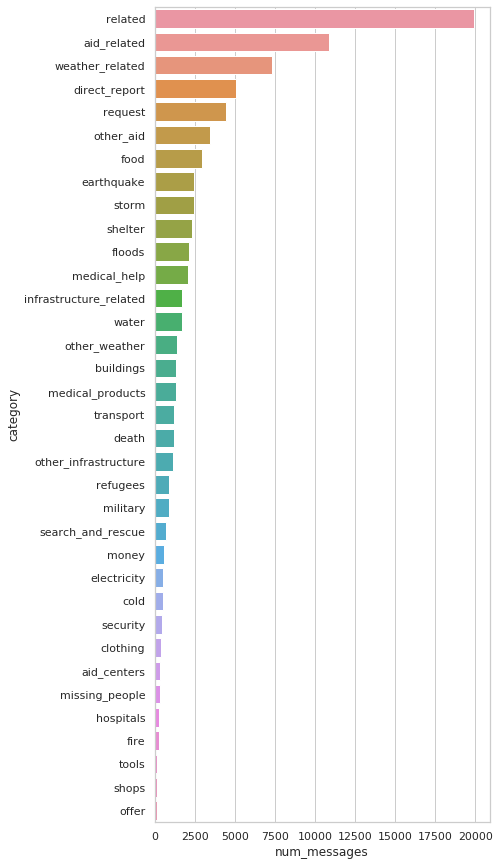

In [23]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="num_messages", y="category", data=messages_by_category);

In [24]:
def count_words(messages):
    num_words_per_message = messages.apply(lambda x: len(x.split(' ')))
    return num_words_per_message.median()

word_counts_by_category = melted_df.groupby('category').message.agg(lambda x: count_words(x)).reset_index(name='num_words')
word_counts_by_category

,category,num_words
0,aid_centers,26.0
1,aid_related,24.0
2,buildings,26.0
3,clothing,24.0
4,cold,26.0
5,death,28.0
6,direct_report,20.0
7,earthquake,20.0
8,electricity,24.0
9,fire,26.0


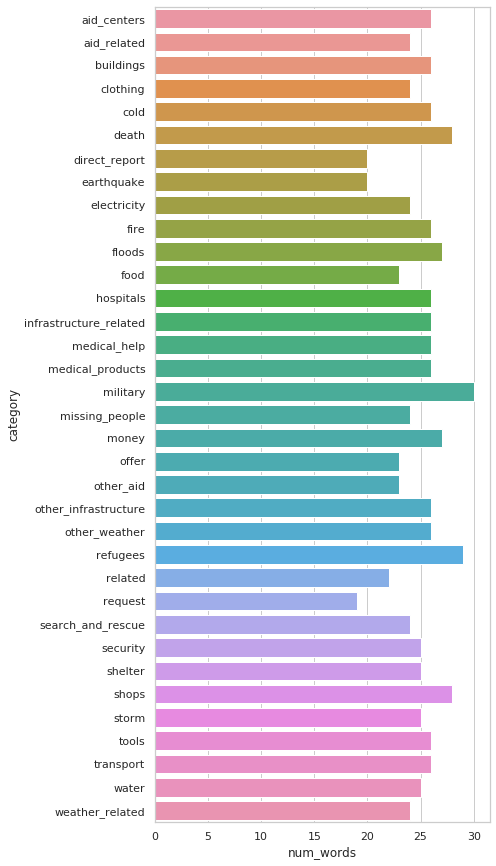

In [25]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="num_words", y="category", data=word_counts_by_category);

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [26]:
engine = create_engine('sqlite:///DisasterResponse.db')
df.to_sql('Message', engine, index=False, if_exists='replace')

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.